In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import levene

In [ ]:
def read_file(filename):
  metrics_dict = {}
  f = open(filename)
  strings = f.readlines()
  for string in strings:
    if string[0:3] != 'Try':
      metrics = string.split(', ')
      for metric in metrics:
        name, value = metric.split(': ')
        if name not in metrics_dict.keys():
          metrics_dict[name] = []
        metrics_dict[name].append(float(value))
  return metrics_dict

# Gowalla metrics statistical tests

In [ ]:
gowalla_our_metrics = read_file('gowalla_linkprediction_rnn_graph_target_training.txt')

In [ ]:
gowalla_our_metrics['hits@1']

[0.794247,
 0.791208,
 0.793804,
 0.793296,
 0.794347,
 0.7925,
 0.792709,
 0.794482,
 0.7945,
 0.793798]

In [ ]:
gowalla_our_mean = {}
for key in gowalla_our_metrics.keys():
  gowalla_our_mean[key] = np.array(gowalla_our_metrics[key]).mean()

In [ ]:
gowalla_our_mean

{'hits@1': 0.7934891000000001,
 'hits@5': 0.9195692,
 'hits@10': 0.9407343999999999,
 'hits@20': 0.960477,
 'hits@50': 0.9844611000000001,
 'hits@100': 0.9959322,
 'map@1': 0.7934891000000001,
 'map@5': 0.846951,
 'map@10': 0.8498156,
 'map@20': 0.8511894,
 'map@50': 0.851975,
 'map@100': 0.8521474,
 'ndcg@1': 0.7934891000000001,
 'ndcg@5': 0.8653972,
 'ndcg@10': 0.8722816,
 'ndcg@20': 0.8772777999999999,
 'ndcg@50': 0.8820748,
 'ndcg@100': 0.8839578000000001}

In [ ]:
gowalla_rnn_baseline = read_file('gowalla_rnn_baseline_training.txt')

In [ ]:
gowalla_rnn_baseline['hits@1']

[0.780919,
 0.781221,
 0.785814,
 0.781861,
 0.777683,
 0.775131,
 0.775046,
 0.783227,
 0.781926,
 0.781327]

In [ ]:
gowalla_rnn_mean = {}
for key in gowalla_rnn_baseline.keys():
  gowalla_rnn_mean[key] = np.array(gowalla_rnn_baseline[key]).mean()

In [ ]:
gowalla_rnn_mean

{'hits@1': 0.7804155,
 'hits@5': 0.9087965,
 'hits@10': 0.9329052000000001,
 'hits@20': 0.9550266000000001,
 'hits@50': 0.9826595999999999,
 'hits@100': 0.9947485,
 'map@1': 0.7804155,
 'map@5': 0.8344765000000001,
 'map@10': 0.8377330000000001,
 'map@20': 0.8392740999999999,
 'map@50': 0.8401848000000001,
 'map@100': 0.8403653999999999,
 'ndcg@1': 0.7804155,
 'ndcg@5': 0.8533332999999999,
 'ndcg@10': 0.8611683999999998,
 'ndcg@20': 0.8667683,
 'ndcg@50': 0.8723053999999999,
 'ndcg@100': 0.8742871000000001}

In [ ]:
gowalla_random_embedding_add = read_file('gowalla_random_embedding_add_training.txt')

In [ ]:
gowalla_random_embedding_add['hits@1']

[0.766492,
 0.767493,
 0.763796,
 0.76959,
 0.770685,
 0.762014,
 0.768941,
 0.770292,
 0.769874,
 0.763643]

In [ ]:
gowalla_random_embedding_mean = {}
for key in gowalla_random_embedding_add.keys():
  gowalla_random_embedding_mean[key] = np.array(gowalla_random_embedding_add[key]).mean()

In [ ]:
gowalla_random_embedding_mean

{'hits@1': 0.767282,
 'hits@5': 0.9019067,
 'hits@10': 0.9295981,
 'hits@20': 0.9525737,
 'hits@50': 0.9800389999999999,
 'hits@100': 0.9945639999999999,
 'map@1': 0.767282,
 'map@5': 0.8234284000000001,
 'map@10': 0.8271685999999999,
 'map@20': 0.8287751,
 'map@50': 0.8296712999999999,
 'map@100': 0.8298851,
 'ndcg@1': 0.767282,
 'ndcg@5': 0.843309,
 'ndcg@10': 0.8523084000000001,
 'ndcg@20': 0.8581327999999999,
 'ndcg@50': 0.8636199,
 'ndcg@100': 0.8659925999999999}

In [ ]:
hits1 = np.array(gowalla_our_metrics['hits@1'])
mu_1 = gowalla_our_mean['hits@1']
s_1 = np.sqrt(np.sum((hits1 - mu_1) * (hits1 - mu_1)) / 9)
hits2 = np.array(gowalla_rnn_baseline['hits@1'])
mu_2 = hits2.mean()
s_2 = np.sqrt(np.sum((hits2 - mu_2) * (hits2 - mu_2)) / 9)
s_d = np.sqrt(s_1*s_1 / 10 + s_2*s_2 / 10)
t = np.abs(mu_1 - mu_2) / s_d
print(t)

11.431334804909971


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import ttest_ind

TtestResult(statistic=11.431334804909971, pvalue=1.0981238159107828e-09, df=18.0)

In [ ]:
print(shapiro(hits1))

ShapiroResult(statistic=0.8754950761795044, pvalue=0.1157885417342186)


In [ ]:
print(shapiro(hits2))

ShapiroResult(statistic=0.907337486743927, pvalue=0.26319849491119385)


In [ ]:
print(levene(hits1, hits2))

LeveneResult(statistic=3.8801155266256537, pvalue=0.06444654897684828)


In [ ]:
ttest_ind(hits1, hits2, equal_var = True, alternative = 'greater')

TtestResult(statistic=11.431334804909971, pvalue=5.490619079553914e-10, df=18.0)

In [ ]:
hits3 = np.array(gowalla_random_embedding_add['hits@1'])
levene(hits1, hits3)

LeveneResult(statistic=8.21160663901639, pvalue=0.010280827470293592)

In [ ]:
print(shapiro(hits3))

ShapiroResult(statistic=0.8881285190582275, pvalue=0.1615268588066101)


In [ ]:
ttest_ind(hits1, hits3, equal_var = False)

TtestResult(statistic=24.912935787620977, pvalue=4.572193092925091e-11, df=11.057754198392706)

In [ ]:
ttest_ind(hits2, hits3)

TtestResult(statistic=8.885403993590705, pvalue=5.32780219068982e-08, df=18.0)

# Brightkite metrics statistical tests

In [ ]:
brightkite_our_metrics = read_file('link_prediction_rnn_graph_target_training.txt')

In [ ]:
brightkite_our_metrics['hits@1']

[0.796934,
 0.795539,
 0.795055,
 0.795049,
 0.796538,
 0.795892,
 0.796441,
 0.797754,
 0.794007,
 0.795898]

In [ ]:
brightkite_our_mean = {}
for key in brightkite_our_metrics.keys():
  brightkite_our_mean[key] = np.array(brightkite_our_metrics[key]).mean()

In [ ]:
brightkite_our_mean

{'hits@1': 0.7959107000000001,
 'hits@5': 0.9114031,
 'hits@10': 0.9309057999999999,
 'hits@20': 0.9489107999999999,
 'hits@50': 0.9745323999999999,
 'hits@100': 0.9902913,
 'map@1': 0.7959107000000001,
 'map@5': 0.8448369,
 'map@10': 0.8474556000000002,
 'map@20': 0.848704,
 'map@50': 0.8495263,
 'map@100': 0.8497548,
 'ndcg@1': 0.7959107000000001,
 'ndcg@5': 0.8617408999999998,
 'ndcg@10': 0.8680635999999999,
 'ndcg@20': 0.872615,
 'ndcg@50': 0.8777090999999999,
 'ndcg@100': 0.8802741000000001}

In [ ]:
brightkite_rnn_baseline = read_file('rnn_baseline_training.txt')

In [ ]:
brightkite_rnn_baseline['hits@1']

[0.781078,
 0.77793,
 0.779333,
 0.774036,
 0.781882,
 0.777833,
 0.790603,
 0.780273,
 0.779474,
 0.783515]

In [ ]:
brightkite_rnn_mean = {}
for key in brightkite_rnn_baseline.keys():
  brightkite_rnn_mean[key] = np.array(brightkite_rnn_baseline[key]).mean()

In [ ]:
brightkite_rnn_mean

{'hits@1': 0.7805956999999999,
 'hits@5': 0.8994695,
 'hits@10': 0.9208386,
 'hits@20': 0.9409391999999999,
 'hits@50': 0.9698815,
 'hits@100': 0.9880154999999998,
 'map@1': 0.7805956999999999,
 'map@5': 0.8305894,
 'map@10': 0.8334531000000002,
 'map@20': 0.8348359000000001,
 'map@50': 0.8357667000000001,
 'map@100': 0.8360302000000001,
 'ndcg@1': 0.7805956999999999,
 'ndcg@5': 0.8480622,
 'ndcg@10': 0.854984,
 'ndcg@20': 0.8600515,
 'ndcg@50': 0.8658093000000001,
 'ndcg@100': 0.8687627000000001}

In [ ]:
brightkite_random_embedding_add = read_file('random_embedding_add_training.txt')

In [ ]:
brightkite_random_embedding_add['hits@1']

[0.772189,
 0.7652,
 0.765499,
 0.773537,
 0.77109,
 0.764301,
 0.77013,
 0.772782,
 0.763705,
 0.765003]

In [ ]:
brightkite_random_embedding_mean = {}
for key in brightkite_random_embedding_add.keys():
  brightkite_random_embedding_mean[key] = np.array(brightkite_random_embedding_add[key]).mean()

In [ ]:
brightkite_random_embedding_mean

{'hits@1': 0.7683436,
 'hits@5': 0.8926076999999999,
 'hits@10': 0.9158027000000001,
 'hits@20': 0.9382640999999999,
 'hits@50': 0.9678501,
 'hits@100': 0.9880859000000001,
 'map@1': 0.7683436,
 'map@5': 0.8202934,
 'map@10': 0.8234047,
 'map@20': 0.8249711999999999,
 'map@50': 0.8259286000000001,
 'map@100': 0.8262195999999999,
 'ndcg@1': 0.7683436,
 'ndcg@5': 0.8386174000000001,
 'ndcg@10': 0.8461337,
 'ndcg@20': 0.8518222999999999,
 'ndcg@50': 0.8577185999999999,
 'ndcg@100': 0.8610056}

In [ ]:
hits1 = np.array(brightkite_our_metrics['hits@1'])
hits2 = np.array(brightkite_rnn_baseline['hits@1'])
hits3 = np.array(brightkite_random_embedding_add['hits@1'])

In [ ]:
shapiro(hits1)

ShapiroResult(statistic=0.9878858327865601, pvalue=0.9935163855552673)

In [ ]:
shapiro(hits2)

ShapiroResult(statistic=0.9074868559837341, pvalue=0.2641708552837372)

In [ ]:
shapiro(hits3)

ShapiroResult(statistic=0.850477933883667, pvalue=0.058854617178440094)

In [ ]:
levene(hits1, hits2)

LeveneResult(statistic=3.9518934663349485, pvalue=0.06224696468970337)

In [ ]:
levene(hits1, hits3)

LeveneResult(statistic=43.64645708033167, pvalue=3.333951606144484e-06)

In [ ]:
ttest_ind(hits1, hits2, equal_var = True)

TtestResult(statistic=10.780413905537655, pvalue=2.775954209222938e-09, df=18.0)

In [ ]:
ttest_ind(hits1, hits3, equal_var = False)

TtestResult(statistic=21.38607559482434, pvalue=6.833178764847292e-10, df=10.332054117118455)

In [ ]:
ttest_ind(hits2, hits3)

TtestResult(statistic=6.596679893557194, pvalue=3.399326791566768e-06, df=18.0)

# Big Gowalla Statistical tests

In [ ]:
big_gowalla_our_metrics = read_file('more_classes_gowalla_link_prediction_rnn_graph_training.txt')

In [ ]:
big_gowalla_our_metrics['hits@1']

[0.568695,
 0.572033,
 0.572424,
 0.569931,
 0.56979,
 0.565276,
 0.570439,
 0.568383,
 0.566149,
 0.570888]

In [ ]:
big_gowalla_our_mean = {}
for key in big_gowalla_our_metrics.keys():
  big_gowalla_our_mean[key] = np.array(big_gowalla_our_metrics[key]).mean()

In [ ]:
big_gowalla_our_mean

{'hits@1': 0.5694008000000002,
 'hits@5': 0.7506321,
 'hits@10': 0.7930062,
 'hits@20': 0.8295625,
 'hits@50': 0.8651414,
 'hits@100': 0.8881815,
 'map@1': 0.5694008000000002,
 'map@5': 0.6423226,
 'map@10': 0.6480466999999999,
 'map@20': 0.65062,
 'map@50': 0.6517925,
 'map@100': 0.6521235,
 'ndcg@1': 0.5694008000000002,
 'ndcg@5': 0.6696144000000002,
 'ndcg@10': 0.6833861,
 'ndcg@20': 0.6926742,
 'ndcg@50': 0.6998024,
 'ndcg@100': 0.7035438}

In [ ]:
big_gowalla_rnn_baseline = read_file('more_classes_gowalla_rnn_baseline_training.txt')

In [ ]:
big_gowalla_rnn_baseline['hits@1']

[0.554908,
 0.555104,
 0.553753,
 0.551622,
 0.554911,
 0.551713,
 0.554312,
 0.555616,
 0.553179,
 0.5537]

In [ ]:
big_gowalla_rnn_mean = {}
for key in big_gowalla_rnn_baseline.keys():
  big_gowalla_rnn_mean[key] = np.array(big_gowalla_rnn_baseline[key]).mean()

In [ ]:
big_gowalla_rnn_mean

{'hits@1': 0.5538818,
 'hits@5': 0.728897,
 'hits@10': 0.7734269,
 'hits@20': 0.8130603000000001,
 'hits@50': 0.8538333,
 'hits@100': 0.879785,
 'map@1': 0.5538818,
 'map@5': 0.6239186999999999,
 'map@10': 0.6299256000000001,
 'map@20': 0.6326962,
 'map@50': 0.6340418999999999,
 'map@100': 0.6344136,
 'ndcg@1': 0.5538818,
 'ndcg@5': 0.6503525,
 'ndcg@10': 0.6648167,
 'ndcg@20': 0.6748624,
 'ndcg@50': 0.6830346,
 'ndcg@100': 0.6872456}

In [ ]:
big_gowalla_random_embedding_add = read_file('more_classes_gowalla_random_embedding_add.txt')

In [ ]:
big_gowalla_random_embedding_add['hits@1']

[0.557248,
 0.557357,
 0.56014,
 0.559891,
 0.557812,
 0.557844,
 0.55585,
 0.558311,
 0.559239,
 0.55615]

In [ ]:
big_gowalla_random_embedding_mean = {}
for key in big_gowalla_random_embedding_add.keys():
  big_gowalla_random_embedding_mean[key] = np.array(big_gowalla_random_embedding_add[key]).mean()

In [ ]:
big_gowalla_random_embedding_mean

{'hits@1': 0.5579841999999999,
 'hits@5': 0.7371231,
 'hits@10': 0.7796054000000001,
 'hits@20': 0.8196623000000001,
 'hits@50': 0.8615207,
 'hits@100': 0.8885894999999999,
 'map@1': 0.5579841999999999,
 'map@5': 0.6299033,
 'map@10': 0.6355987,
 'map@20': 0.6383955,
 'map@50': 0.6397673,
 'map@100': 0.6401571,
 'ndcg@1': 0.5579841999999999,
 'ndcg@5': 0.6569095,
 'ndcg@10': 0.6706732,
 'ndcg@20': 0.6808215000000001,
 'ndcg@50': 0.6891943,
 'ndcg@100': 0.6935928}

In [ ]:
hits1 = np.array(big_gowalla_our_metrics['hits@1'])
hits2 = np.array(big_gowalla_rnn_baseline['hits@1'])
hits3 = np.array(big_gowalla_random_embedding_add['hits@1'])

In [ ]:
ttest_ind(hits1, hits2)

TtestResult(statistic=18.11333377429737, pvalue=5.289414739455625e-13, df=18.0)

In [ ]:
ttest_ind(hits1, hits3)

TtestResult(statistic=13.155386764118198, pvalue=1.133357302604098e-10, df=18.0)

In [ ]:
ttest_ind(hits2, hits3)

TtestResult(statistic=-6.484568269961519, pvalue=4.2425054864766545e-06, df=18.0)

# Linear layer training graphics construction

In [ ]:
f = open('linear_layer_target_training_3883.txt')
strings = f.readlines()
losses = []
test_hits1 = []
for string in strings:
  metrics = string.split(' ')
  loss = float(metrics[3])
  hits1 = float(metrics[5])
  losses.append(loss)
  test_hits1.append(hits1)

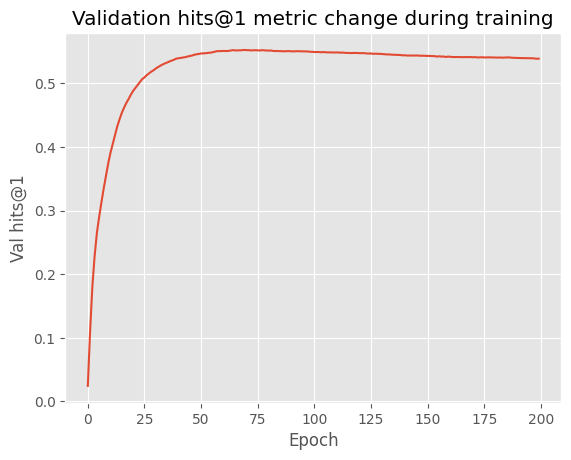

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.title('Validation hits@1 metric change during training')
plt.xlabel('Epoch')
plt.ylabel('Val hits@1')
plt.plot(test_hits1)

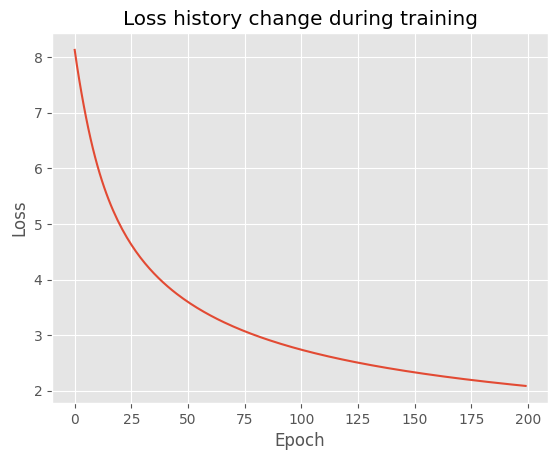

In [ ]:
plt.style.use('ggplot')
plt.title('Loss history change during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(losses)